In [2]:
import pandas as pd

from germansentiment import SentimentModel
import time as tm
import numpy as np


In [4]:
pd.read_csv("../../temp_tweet_database_08_31.csv", lineterminator='\n')

/Users/nicolas/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,source,lang,tweet_created_at,author_id,text,tweet_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,public_metrics.listed_count,location,party,withheld.copyright,withheld.country_codes_x,withheld.scope_x,withheld.country_codes_y,withheld.scope_y,withheld.country_codes,withheld.scope
0,0,Twitter for Android,de,2021-08-30T23:59:03.000Z,1082371703181844480,SPD 40% Wann? https://t.co/ShYjuURkmS,1432493097821245445,0,2,2,...,3,NaN,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Eauto Check,de,2021-08-30T23:58:56.000Z,1552359542,https://t.co/208fqUCvpj Scholz im Triell wie M...,1432493065994973188,0,0,0,...,22,Lutherstadt Wittenberg,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Twitter for Android,de,2021-08-30T23:58:34.000Z,848002447385735168,"@BBacterioO Weil das pfui ist, so wie links se...",1432492973674147843,0,0,1,...,2,sachsn || he/er,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Twitter for Android,de,2021-08-30T23:58:08.000Z,2912522008,@darioschramm Dabei dann bitte Mal anschauen w...,1432492867444948993,0,0,2,...,13,Bremen,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Twitter for iPad,de,2021-08-30T23:57:48.000Z,546683248,@dervolkan @JoergWimalasena @larsweisbrod Ziem...,1432492782581596168,5,1,32,...,59,Berlin,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61563,61563,Twitter Web App,de,2021-08-30T00:24:36.000Z,714433337356599296,btw: Die #KAMPA2021 war sehr gut!\n@DiePARTEI_...,1432137140876546062,0,1,2,...,11,Bremen,OTHERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61564,61564,Twitter Web App,de,2021-08-30T00:24:33.000Z,714433337356599296,^^Irgendwann zwischen meiner 2. &amp; 3. (erfo...,1432137125038891008,1,1,2,...,11,Bremen,OTHERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61565,61565,Twitter Web App,de,2021-08-30T00:24:30.000Z,714433337356599296,#Wahlkriegsmeldung: \nNeulich bei #TeamOlaf (#...,1432137116142776320,0,1,10,...,11,Bremen,OTHERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61566,61566,Twitter for iPad,de,2021-08-30T00:08:49.000Z,712637855672242176,@holgertma Er konnte schon seit längerer Zeit ...,1432133169390788616,0,0,0,...,3,"Dresden, Sachsen",OTHERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install germansentiment

In [255]:
data_full = pd.read_csv(data_path + "df_all.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
# get 1000 tweets per iteration 
len(data_full) / 400

986.8875

In [92]:
max_len = (len(data_full) + x)
max_len

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 28.1 µs


In [113]:
x = 987

In [114]:
full_sentiment = []

In [115]:
all_id_with_sentiment = []

In [ ]:
# this for loop throws an error, last two buckets are done afterwards
%%time
counter = 0

# iterate over a range of 0, 394.755 with step size 987
for i in range(0,max_len, x):

  # get start time of iteration
  start = tm.time()

  # print counter
  counter += 1
  print(f"Starting iteration {counter}")

  # slice dataframe for the current 987 rows
  temp = data_full.iloc[i: (i + x)]

  # turn tweets into a list for sentiment analysis
  temp_tweets = list(temp.tweet)

  # turn tweet id in a list to know what tweets are used
  all_id_with_sentiment.append(list(temp.id))
  
  # predict sentiment analysis on current 987 tweets
  temp_result = model.predict_sentiment(temp_tweets)

  # append to before defined empty list
  full_sentiment.append(temp_result)

  # compute runtime for iteration
  stop = tm.time()
  print(f"Finished iteration {counter} in {stop-start} seconds")

In [238]:
# get data slice of last two missing iterations
first_missing_data = list(data_full.iloc[x * 398: x*399].tweet)
second_missing_data = list(data_full.iloc[x * 399:].tweet)

In [239]:
# somehow a float in there; fix with this
first_missing_data = [str(x) for x in first_missing_data]

In [240]:
missing_results = []

In [241]:
# predicting last two iterations
p1 = model.predict_sentiment(first_missing_data)
missing_results.append(p1)

p2 = model.predict_sentiment(second_missing_data)
missing_results.append(p2)

In [217]:
#appending result to final output
full_sentiment.append(missing_results[0])
full_sentiment.append(missing_results[1])

In [ ]:
#turning list of lists for each iteration into one list
sentiment_values = sum(full_sentiment_real, [])

In [249]:
#checking correct prediction lenght
len(sentiment_values) == len(data_full)

True

In [250]:
#adding sentiment collumn to tweet DF
data_full["sentiment"] = sentiment_values

In [152]:
tr = pd.DataFrame(sentiment_values, columns = ["sentiment"])

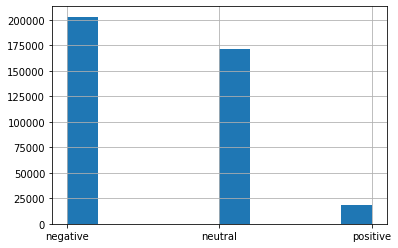

In [154]:
tr.sentiment.hist()

In [252]:
# saving csv and downloading it
data_full.to_csv("data_full_sentiment.csv")
files.download("data_full_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>